In [2]:
import sys
import os

import sys
from pathlib import Path

src_path = Path('..') / 'src'
sys.path.append(str(src_path.resolve()))

# # Ensure the custom module path is included
# src_path = os.path.abspath(os.path.join(os.pardir, "print(src_path)"))
# if src_path not in sys.path:
#     sys.path.append(src_path)

# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='whitegrid')

# Custom modules
import acquisition
import cleaning
import feature_engineering
import model_training
import evaluate_script



Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'monthly_charges_tenure', 'monthly_charges_squared', 'total_charges_squared', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No 

In [3]:

# Example: Load raw data

df = acquisition.load_data('/Users/samirsitaula/Documents/Selfpaced_Practice/projects/customer_clv_churn/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Clean the data
def clean_data(df):
    df = df.copy()
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df.dropna(inplace=True)
    df.drop_duplicates(inplace=True)
    return df

In [6]:
# Prepare features
def prepare_features(df):
    df = df.copy()
    df = df.drop(['customerID'], axis=1)
    df = pd.get_dummies(df, drop_first=True)
    X = df.drop('Churn_Yes', axis=1)
    y = df['Churn_Yes']
    return X, y

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

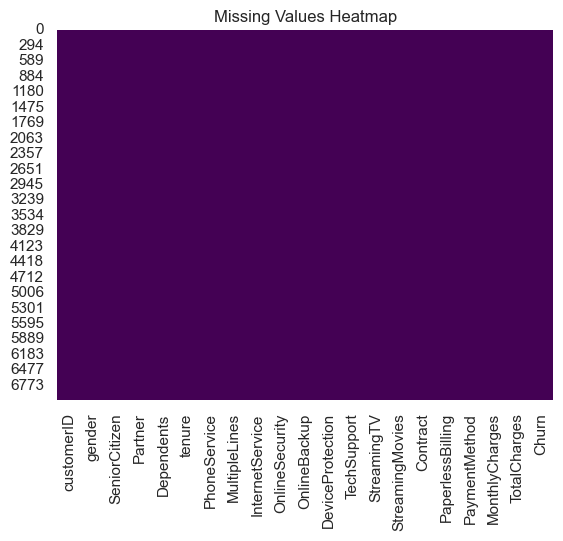

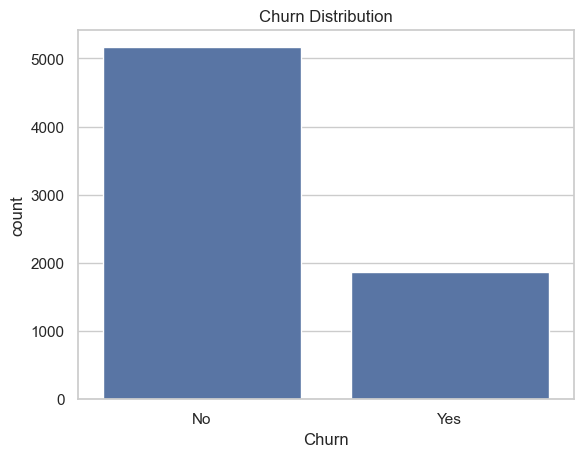

In [8]:
# Run EDA steps
df_cleaned = clean_data(df)

# Visual inspection
print(df_cleaned.head())
df_cleaned.info()

# Descriptive statistics
print(df_cleaned.describe())

# Null heatmap
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Class distribution
sns.countplot(data=df_cleaned, x='Churn')
plt.title("Churn Distribution")
plt.show()

X, y = prepare_features(df_cleaned)